## Importing Essentials

In [1]:
#pip install -U seaborn

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from plotly import tools
from string import ascii_letters



from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Regression Modeling
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.formula.api import ols

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc

from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('insurance.csv')

## Exploratory Data Analysis

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df_age = df.groupby(by='age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualization

<h3> Distribution of Medical Charges </h3> 

In [12]:
# Determine the distribution of charge
charge_dist = df["charges"].values
logcharge = np.log(df["charges"])



trace0 = go.Histogram(
    x=charge_dist,
    histnorm='probability',
    name="Charges Distribution",
    marker = dict(
        color = '#FA5858',
    )
)
trace1 = go.Histogram(
    x=logcharge,
    histnorm='probability',
    name="Charges Distribution using Log",
    marker = dict(
        color = '#58FA82',
    )
)

fig = tools.make_subplots(rows=2, cols=1,
                          subplot_titles=('Charge Distribution','Log Charge Distribution'),
                         print_grid=False)



fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)


fig['layout'].update(showlegend=True, title='Charge Distribution', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

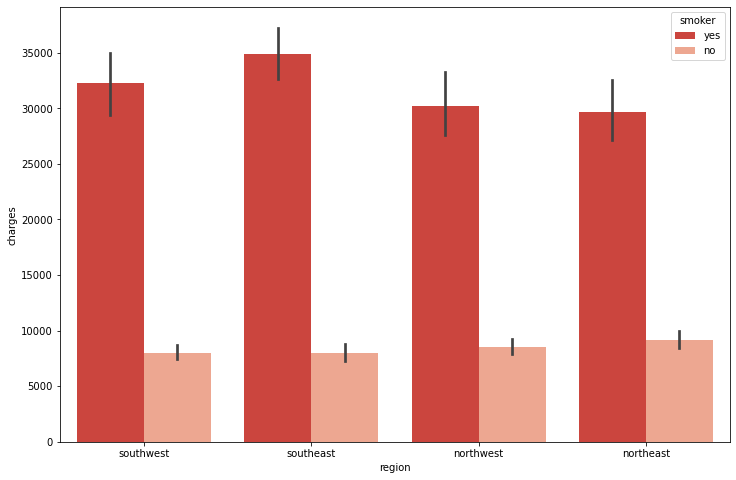

In [13]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

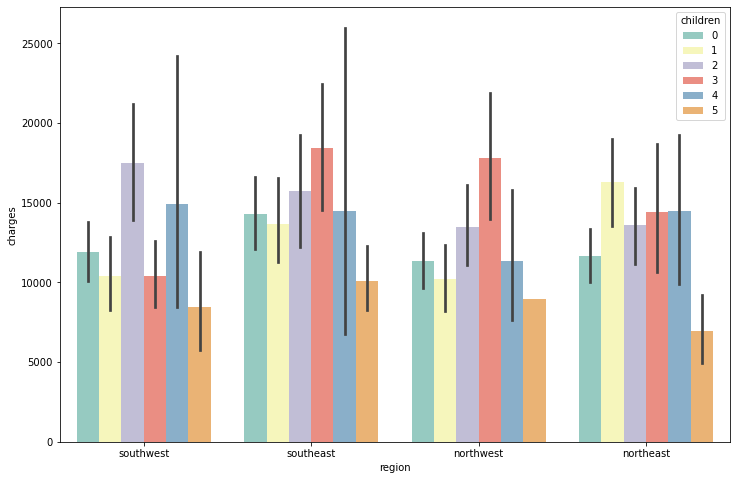

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A38CAC6100>,
      dtype=object)

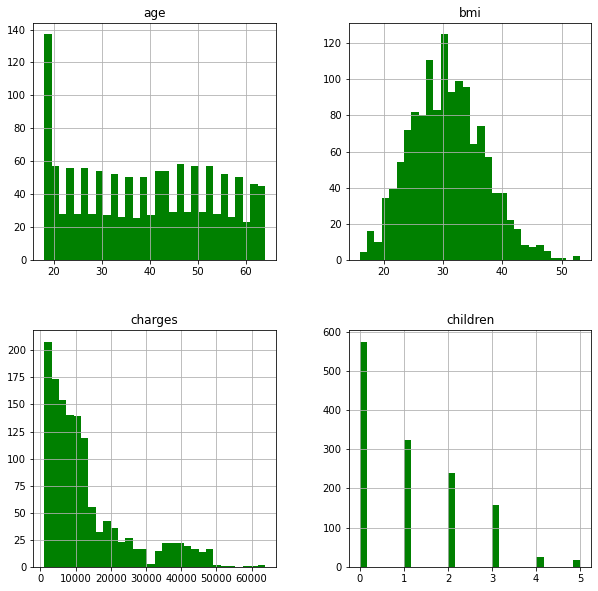

In [15]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins=30, figsize=(10,10),color='green')

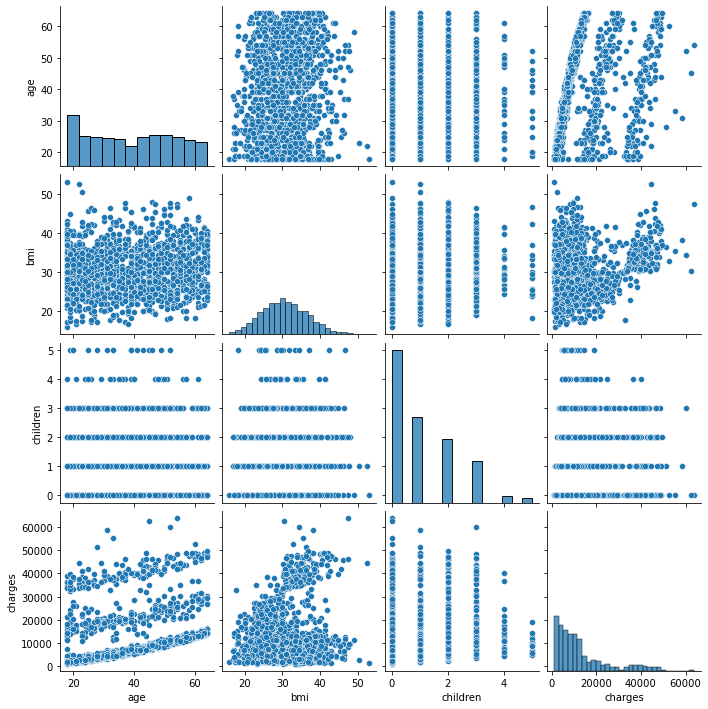

In [16]:
sns.pairplot(df)

Check the realtionship between the age and Charges

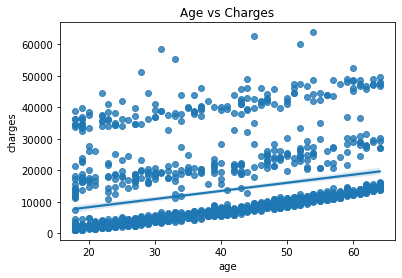

In [17]:
sns.regplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

Lets compare the correlation between age and charges using the ANOVA table

In [18]:
agechar_lm = ols("age ~ charges", data=df).fit()
print(agechar_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           4.89e-29
Time:                        14:44:42   Log-Likelihood:                -5371.2
No. Observations:                1338   AIC:                         1.075e+04
Df Residuals:                    1336   BIC:                         1.076e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6034      0.544     63.601      0.0

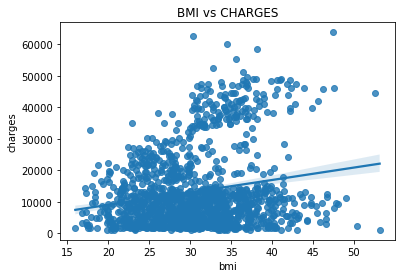

In [19]:
sns.regplot(x='bmi', y='charges', data=df)
plt.title('BMI vs CHARGES')
plt.show()

As we know that machine can understand only numbers, so let's convert it into numbers.

In [20]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
#smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Correlation between different attriubtes of the data

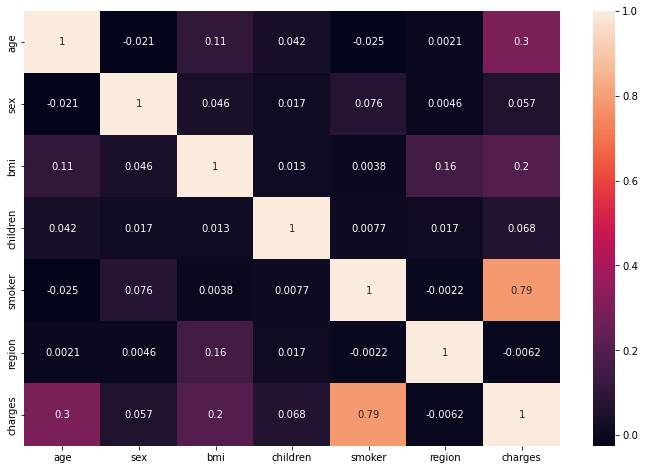

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Distrubtion of charges between smokers and non-smokers

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

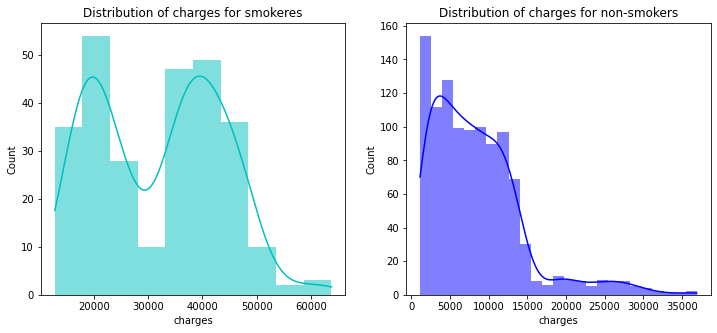

In [23]:
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.histplot(df[(df.smoker==1)]['charges'], color='c',ax=ax,kde=True, linewidth=0)
ax.set_title('Distribution of charges for smokeres')

ax = f.add_subplot(122)
sns.histplot(df[(df.smoker==0)]['charges'],color='b',ax=ax,kde=True,linewidth=0)
ax.set_title('Distribution of charges for non-smokers')

<Figure size 576x576 with 0 Axes>

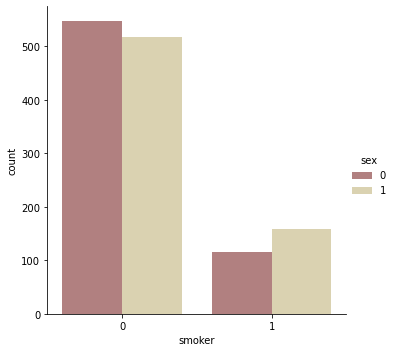

In [24]:
plt.figure(figsize=(8,8))
sns.catplot(x='smoker', kind='count', hue='sex', palette='pink', data=df)

Please note that women are coded with the symbol " 1 "and men "0"

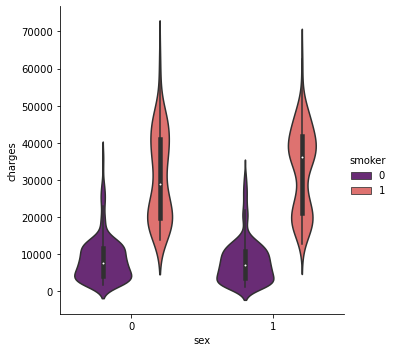

In [25]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')

## Charges (Based on Sex)

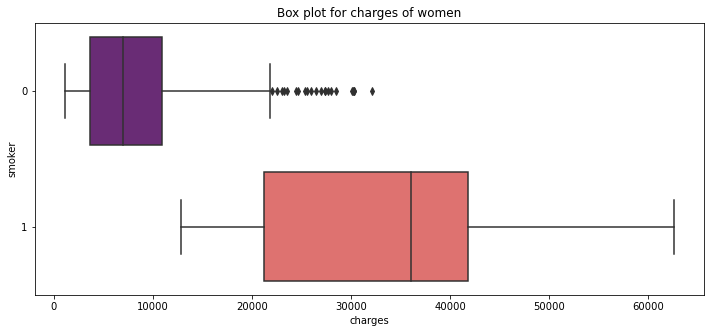

In [26]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y='smoker',x='charges',data=df[(df.sex == 1)] , orient='h',palette='magma')

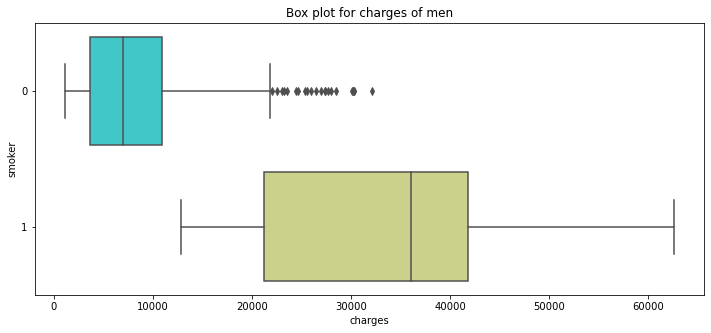

In [27]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y='smoker',x='charges',data=df[(df.sex == 1)] , orient='h',palette='rainbow')

Lets seehow age affects the cost of treatment

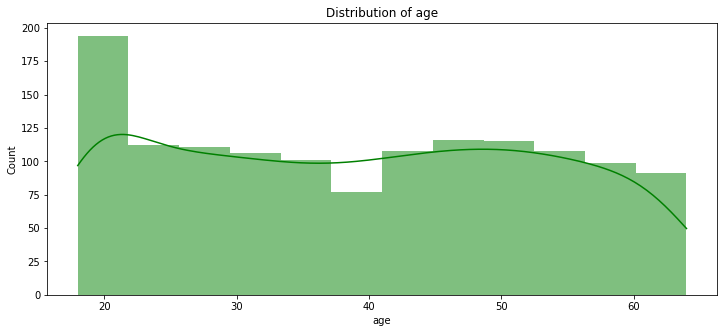

In [28]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
sns.histplot(df['age'],color='g',kde=True, linewidth=0)

### Young age charges

Let's check whether there are smokers among pateints 25 years.

Text(0.5, 1.0, 'The number of smokers and non-smokers (25 years old or less)')

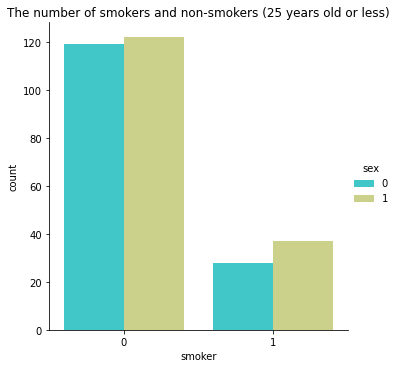

In [29]:
sns.catplot(x='smoker', kind='count', hue='sex', palette='rainbow',data=df[(df.age <= 25)])
plt.title("The number of smokers and non-smokers (25 years old or less)")

For 25 years old or younger, let's check the treatment cost of this age.

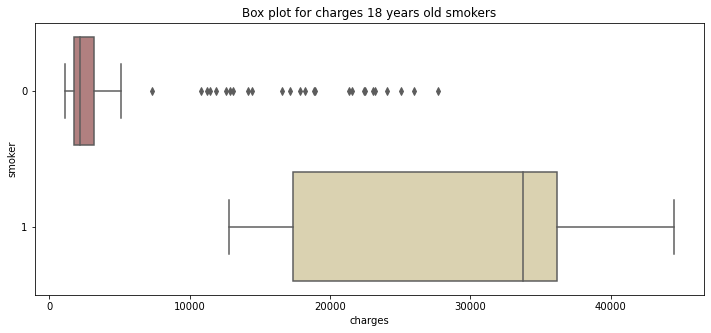

In [30]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y='smoker', x='charges', data=df[(df.age <=25)],orient='h',palette='pink')

### Now let's check about BMI

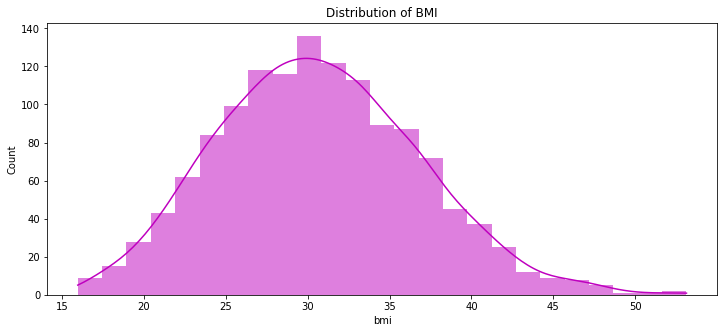

In [31]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
ax = sns.histplot(df['bmi'],color="m",kde=True, linewidth=0)

The average BMI in patients is 30. 

### BMI range

BMI ----> Weight status

below 18.5 ----> Underweight

18.5 - 24.9 ----> Normal Weight

25.0 - 29.9 ----> Overweight

30.0 - 34.9 ----> Obeisty Class I

35.0 - 39.9 ----> Obesity Class II

Above 40 ----> Obesity Class III

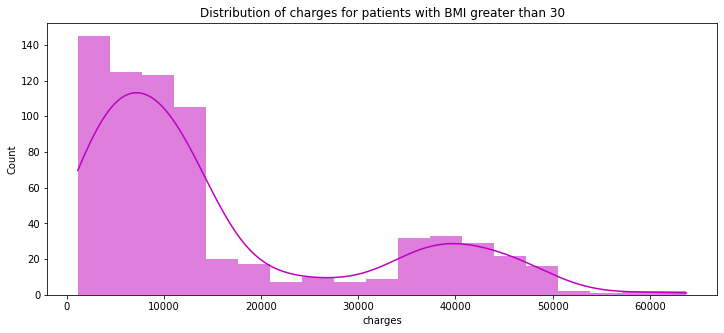

In [32]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.histplot(df[(df.bmi >= 30)]['charges'], color = 'm', kde=True,linewidth=0)

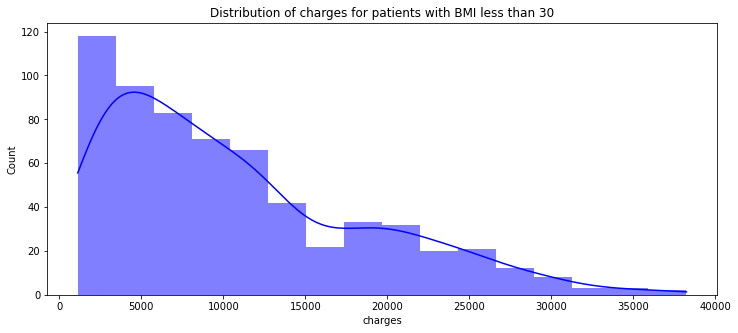

In [33]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.histplot(df[(df.bmi<30)]['charges'], color='b', kde=True,linewidth=0)

#### Patients with BMI above 30 spend more on treatment

Let's pay attention to children. First, let's see how many children our patients have.

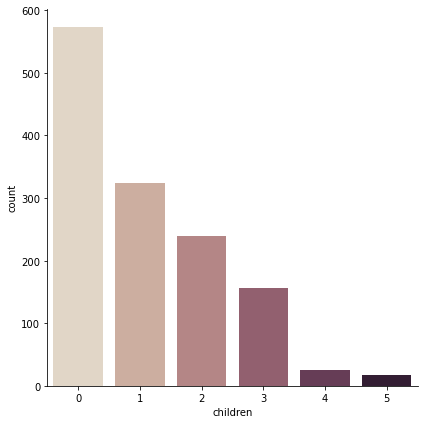

In [34]:
sns.catplot(x="children", kind="count", palette="ch:.25",data=df, height=6)

Most patients do not have children.

Text(0.5, 1.0, 'Smokers and non-smokers who have children')

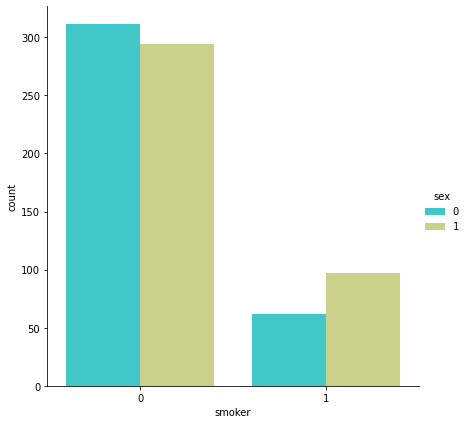

In [35]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue="sex",data=df[(df.children > 0)], height=6)
ax.set_title("Smokers and non-smokers who have children")

### Label encoder to transform columns before test/train the data

In [36]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Splitting the data into training and testing 

In [38]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

### Linear Regression

In [39]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_train_pred = Lin_reg.predict(x_train)
y_test_pred = Lin_reg.predict(x_test)
LRSC = Lin_reg.score(x_test, y_test)
coeff_df = pd.DataFrame(Lin_reg.coef_, x.columns, columns=['Coefficient'])

print(Lin_reg.intercept_)
print(Lin_reg.score(x_test, y_test))
coeff_df

-11661.983908824392
0.7998747145449959


,Coefficient
age,253.991852
sex,-24.324551
bmi,328.402617
children,443.729295
smoker,23568.879484
region,-288.508573


In [40]:
print(Lin_reg.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.7998747145449959
Mean Absolute Error: 3930.3332739011403
Mean Squared Error: 31845929.13415944
Root Mean Squared Error: 5643.219748880902


### Ridge Regression

In [41]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
y_train_pred1 = Ridge.predict(x_train)
y_test_pred1 = Ridge.predict(x_test)
RRSC = Ridge.score(x_test, y_test)
coeff2_df = pd.DataFrame(Ridge.coef_, x.columns, columns=['Coefficient'])
print(Ridge.intercept_)
print(Ridge.score(x_test, y_test))
print(Ridge.coef_)
coeff2_df


-11643.440927495818
0.799698963206314
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]


,Coefficient
age,253.893751
sex,-21.511228
bmi,328.339566
children,444.238477
smoker,23500.967431
region,-289.027871


In [42]:
print(Ridge.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))

0.799698963206314
Mean Absolute Error: 3936.645077764159
Mean Squared Error: 31873896.438061956
Root Mean Squared Error: 5645.697161384231


### Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
LASC = Lasso.score(x_test, y_test)
coeff3_df = pd.DataFrame(Lasso.coef_, x.columns, columns=['Coefficient'])
y_train_pred2 = Lasso.predict(x_train)
y_test_pred2 = Lasso.predict(x_test)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))
coeff3_df



-11661.838929039537
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224705


,Coefficient
age,253.991436
sex,-23.456982
bmi,328.389438
children,443.587436
smoker,23567.613551
region,-288.340296


In [44]:
print(Ridge.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

0.799698963206314
Mean Absolute Error: 3930.4787565896063
Mean Squared Error: 31846834.73044648
Root Mean Squared Error: 5643.299985863456


### Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor as rfr
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
y_train_pred3 = Rfr.predict(x_train)
y_test_pred3 = Rfr.predict(x_test)
RFSC = metrics.r2_score(y_test,y_test_pred3, y_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(y_train_pred3, y_train),
       metrics.mean_squared_error(y_test_pred3, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,y_train_pred3, y_train),
       metrics.r2_score(y_test,y_test_pred3, y_test)))
print('Root Mean Squared Error Test: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3,y_test)))
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred3, y_train)))
print('Mean Absolute Error Test:', metrics.mean_absolute_error(y_test, y_test_pred3,y_test))
print('Mean Absolute Error Train:', metrics.mean_absolute_error(y_train, y_train_pred3,y_train))


MSE train data: 3635087.011, MSE test data: 19766481.085
R2 train data: 0.971, R2 test data: 0.877
Root Mean Squared Error Test:  5459.5554106791715
Root Mean Squared Error Train: 2525.529114632888
Mean Absolute Error Test: 3148.909848040579
Mean Absolute Error Train: 1426.7860239588592


### Now I am going to test to see if by using polynomial features, we can get a better fit from the model

In [46]:
poly_model_df = df.drop('region', axis=1)
poly_model_df = pd.get_dummies(data=poly_model_df, columns=['sex', 'smoker'], drop_first=True)
X = poly_model_df.drop('charges', axis=1)
y = poly_model_df['charges']
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


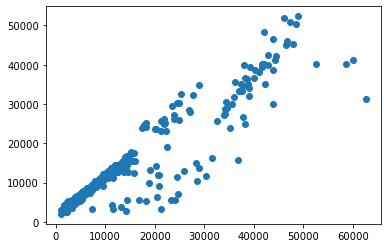

In [47]:
poly_lm = LinearRegression()
poly_lm.fit(X_train, y_train)
predictions = poly_lm.predict(X_test)
plt.scatter(y_test, predictions)

In [48]:
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean Absoutle Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('R-Squared: ' + str(poly_lm.score(X_test, y_test)))
PLSC = poly_lm.score(X_test,y_test)


Root Mean Squared Error : 4769.309492241802
Mean Absoutle Error: 2880.551559899739
Mean Squared Error: 22746313.03278776
R-Squared: 0.8560717362109009


### Following the machine learning tests on the test and train set conducted, below is a table which ranks to best performing to least performing

In [49]:
models = pd.DataFrame({
                'Models': ['Linear Regression', 'Ridge Regression', 'Lasso Regression','Random Forest Regressor','Polynomial'],
                'R-Squared Test Score':  [LRSC, RRSC, LASC, RFSC, PLSC]})

models.sort_values(by='R-Squared Test Score', ascending=False)

,Models,R-Squared Test Score
3,Random Forest Regressor,0.877009
4,Polynomial,0.856072
0,Linear Regression,0.799875
2,Lasso Regression,0.799869
1,Ridge Regression,0.799699


Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218724)
3.age(0.136971)
4.children(0.021047)
5.region(0.015208)
6.sex(0.006371)


<BarContainer object of 6 artists>

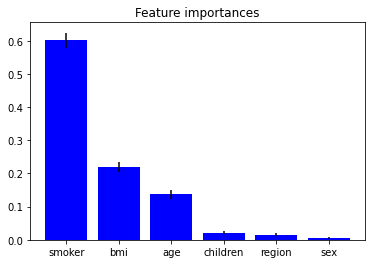

In [50]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="b", yerr=std[indices], align="center")

In [51]:
X = df.drop(['charges'],axis=1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1070, 6)
(268, 6)


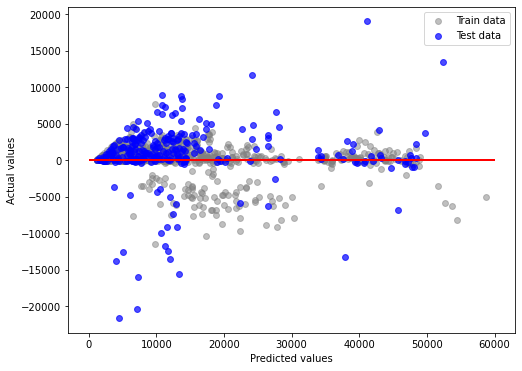

In [52]:
plt.figure(figsize=(8,6))

plt.scatter(y_train_pred3, y_train_pred3 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred3, y_test_pred3 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')